<a href="https://colab.research.google.com/github/archajoshy/Advanced-Computing-Lab/blob/main/Experiment%2011/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
data=keras.datasets.mnist

In [2]:
(X_train,y_train),(X_test,y_test)=data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

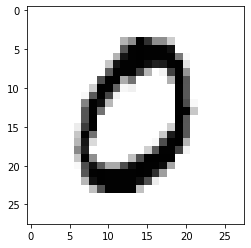

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[58500],cmap='binary')

In [8]:
y_train[58500]

0

In [9]:
X_train=X_train.reshape((60000,28,28,1))

In [10]:
X_test=X_test.reshape((10000,28,28,1))

In [11]:
X_train=X_train.astype('float32')/255

In [12]:
X_test=X_test.astype('float32')/255

In [13]:
model=keras.models.Sequential()

In [14]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3,restore_best_weights=True)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 19s 4ms/step - loss: 0.1304 - accuracy: 0.9606 - val_loss: 0.0506 - val_accuracy: 0.9831
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0335 - val_accuracy: 0.9887
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.0326 - val_accuracy: 0.9902
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0327 - val_accuracy: 0.9898
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0341 - val_accuracy: 0.9903
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0384 - val_accuracy: 0.9893
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0352 - val_accuracy

In [22]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0793 - accuracy: 0.9914


In [23]:
print(test_loss,test_accuracy)

0.07932419329881668 0.9914000034332275


In [19]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.0 MB/s 


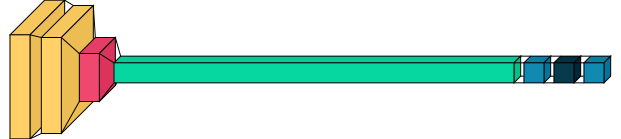

In [20]:
import visualkeras
visualkeras.layered_view(model)